In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
starbucks = pd.read_csv('starbucks.csv')
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [3]:
starbucks.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [4]:
total_entries = starbucks.shape[0]
total_entries

242

In [5]:
column_names = starbucks.columns

print("Column Names:")
for i, col in enumerate(column_names, start=1):
    print(f"{i}. {col}")

Column Names:
1. Beverage_category
2. Beverage
3. Beverage_prep
4. Calories
5.  Total Fat (g)
6. Trans Fat (g) 
7. Saturated Fat (g)
8.  Sodium (mg)
9.  Total Carbohydrates (g) 
10. Cholesterol (mg)
11.  Dietary Fibre (g)
12.  Sugars (g)
13.  Protein (g) 
14. Vitamin A (% DV) 
15. Vitamin C (% DV)
16.  Calcium (% DV) 
17. Iron (% DV) 
18. Caffeine (mg)


In [6]:
starbucks.index

RangeIndex(start=0, stop=242, step=1)

In [7]:
most_sugared_drink = starbucks.sort_values(by=' Sugars (g)', ascending=False).iloc[0]
most_sugared_drink

Beverage_category                  Frappuccino® Blended Coffee
Beverage                     Java Chip (Without Whipped Cream)
Beverage_prep                                Venti Nonfat Milk
Calories                                                   420
 Total Fat (g)                                               5
Trans Fat (g)                                              4.0
Saturated Fat (g)                                          0.0
 Sodium (mg)                                                 5
 Total Carbohydrates (g)                                   340
Cholesterol (mg)                                            90
 Dietary Fibre (g)                                           2
 Sugars (g)                                                 84
 Protein (g)                                               7.0
Vitamin A (% DV)                                           10%
Vitamin C (% DV)                                            0%
 Calcium (% DV)                                        

In [8]:
starbucks['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [9]:
starbucks['Beverage_category'].nunique()

9

In [10]:
top_5_categories = starbucks['Beverage_category'].value_counts().head(5)
top_5_categories

Beverage_category
Classic Espresso Drinks        58
Tazo® Tea Drinks               52
Signature Espresso Drinks      40
Frappuccino® Blended Coffee    36
Shaken Iced Beverages          18
Name: count, dtype: int64

In [11]:
drink_calories_mean = starbucks.groupby('Beverage')['Calories'].mean()
sorted_drink_calories_mean = drink_calories_mean.sort_values(ascending=False)
sorted_drink_calories_mean

Beverage
White Chocolate Mocha (Without Whipped Cream)          330.000000
Java Chip (Without Whipped Cream)                      327.777778
Banana Chocolate Smoothie                              290.000000
Strawberry Banana Smoothie                             290.000000
Tazo® Green Tea Latte                                  275.000000
Mocha (Without Whipped Cream)                          272.222222
Caramel (Without Whipped Cream)                        268.888889
Orange Mango Banana Smoothie                           266.666667
Strawberries & Crème (Without Whipped Cream)           248.888889
Caramel Apple Spice (Without Whipped Cream)            247.500000
Hot Chocolate (Without Whipped Cream)                  236.666667
Java Chip                                              220.000000
Caffè Mocha (Without Whipped Cream)                    210.000000
Coffee                                                 210.000000
Vanilla Bean (Without Whipped Cream)                   197.500000
T

In [12]:
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks['Calories'] = pd.to_numeric(starbucks['Calories'], errors='coerce')

starbucks['caffeine_to_calories'] = starbucks['Caffeine (mg)'] / starbucks['Calories']
starbucks.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),caffeine_to_calories
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,58.333333
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,65.000000
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,66.000000
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,82.000000
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,1.071429
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75.0,0.750000
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75.0,1.071429
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75.0,0.750000
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75.0,0.500000
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75.0,0.681818


In [13]:
bev_cat_caff_to_cal_mean = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()

Beverage_Categories_Sorted_By_CaffToCal_Ratio = bev_cat_caff_to_cal_mean.sort_values(ascending=False)

Beverage_Categories_Sorted_By_CaffToCal_Ratio.head(1)

Beverage_category
Coffee    67.833333
Name: caffeine_to_calories, dtype: float64

<BarContainer object of 9 artists>

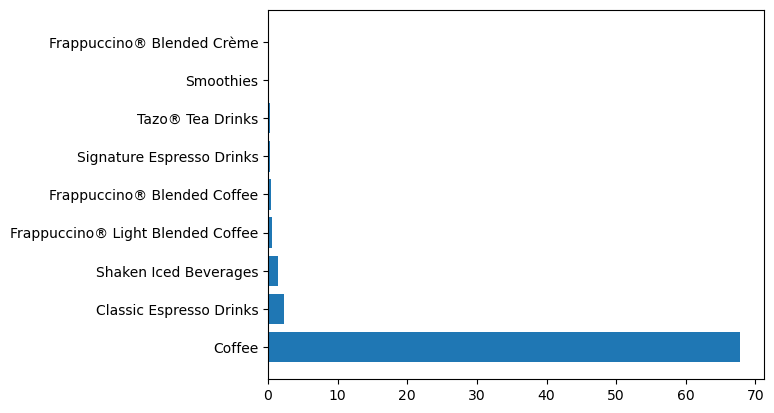

In [17]:
plt.barh(Beverage_Categories_Sorted_By_CaffToCal_Ratio.index, Beverage_Categories_Sorted_By_CaffToCal_Ratio)

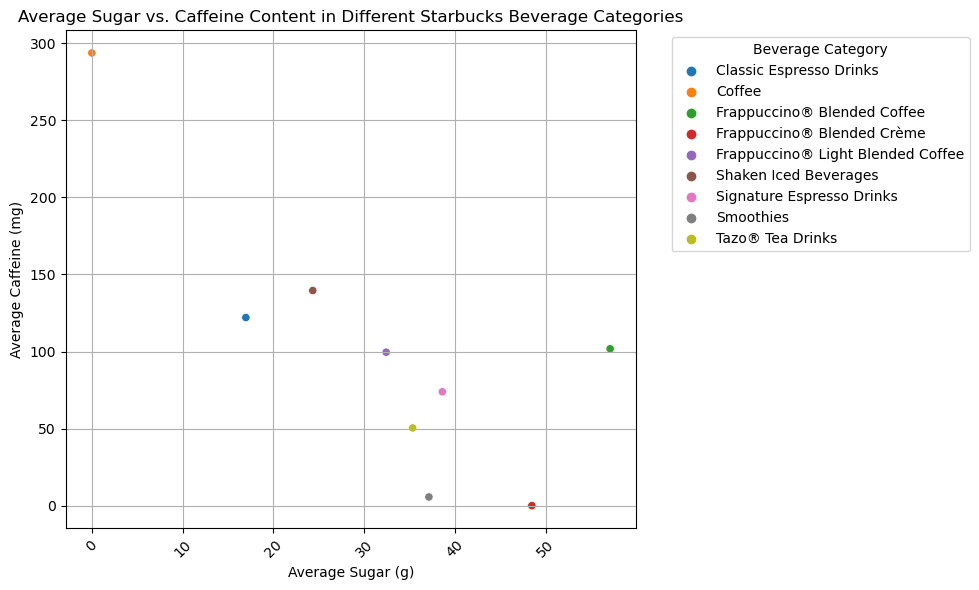

In [16]:
# Replace 'Varies' and 'varies' in 'Caffeine (mg)' with NaN and convert to numeric
starbucks['Caffeine (mg)'].replace(['Varies', 'varies'], [None, None], inplace=True)
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'])

# Remove rows with missing caffeine values
starbucks_data_cleaned = starbucks.dropna(subset=['Caffeine (mg)'])

# Grouping by Beverage Category and calculating average sugar and caffeine content
grouped_data_cleaned = starbucks_data_cleaned.groupby('Beverage_category').agg(
    Avg_Sugar_g=(' Sugars (g)', 'mean'),
    Avg_Caffeine_mg=('Caffeine (mg)', 'mean')
).reset_index()

# Plotting the relationship between average sugar and caffeine content for each beverage category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data_cleaned, x='Avg_Sugar_g', y='Avg_Caffeine_mg', hue='Beverage_category')
plt.title('Average Sugar vs. Caffeine Content in Different Starbucks Beverage Categories')
plt.xlabel('Average Sugar (g)')
plt.ylabel('Average Caffeine (mg)')
plt.xticks(rotation=45)
plt.legend(title='Beverage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()